In [ ]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [ ]:
! kill -9 $(ps -A | grep python | awk '{print $1}')

귀무 가설, 대립 가설

In [ ]:
import numpy as np
from scipy import stats

np.random.seed(1) # 동일한 난수 생성

# 귀무가설을 학생들의 평균키가 173과 같다
# 대립가설은 학생들의 평균키가 173과 다르다

#평균 178 표준편차 5
# 의도적으로 귀무가설을 기각되게 173이 아닌 178으로 정함

heights = [178+np.random.normal(0,5) for _ in range(20)]

# t-검정 메서드 stats.ttest_1samp() 
# 유의 확률 >= 0.05 귀무가설 채택
# 유의 확률 < 0.05 대립가설 채택

tTestRes = stats.ttest_1samp(heights,173)
tTestRes
# 결과 -> Ttest_1sampResult(statistic=3.434767428066461, pvalue=0.00277711459981648)



Ttest_1sampResult(statistic=3.434767428066461, pvalue=0.00277711459981648)

푸아송 분포

    단위 시간에 어떤 사건이 몇번 일어 난 것이지 표현

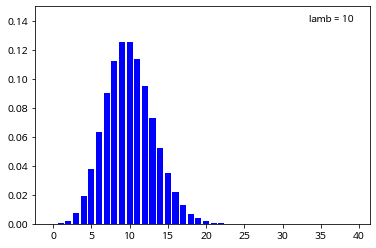

In [ ]:
from math import factorial, exp
import matplotlib.pyplot as plt 

def pois_dist(n , lamb):
  return (lamb ** n) *exp(-lamb)/ factorial(n)

def poisson_f():
  x = np.arange(40)  
  pd = np.array([pois_dist(n,10) for n in range(40)])
  plt.ylim(0,0.15)
  plt.text(33.5,0.14,'lamb = 10')
  plt.bar(x,pd,color = 'blue')
  plt.show()

poisson_f()


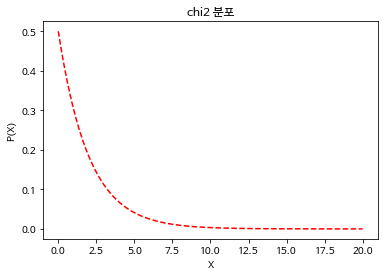

In [ ]:
# 카이제곱 분포
from scipy.stats import chi2
dof = 2 # 자유도
x = np.linspace(0,20,200)
y = chi2(dof).pdf(x)
plt.plot(x,y,'r--')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title('chi2 분포')
plt.show()

[*********************100%***********************]  2 of 2 completed
타입 확인 :  <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2022-01-04 to 2022-10-20
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, 005930.KS)  194 non-null    float64
 1   (Adj Close, ^KS11)      194 non-null    float64
 2   (Close, 005930.KS)      194 non-null    float64
 3   (Close, ^KS11)          194 non-null    float64
 4   (High, 005930.KS)       194 non-null    float64
 5   (High, ^KS11)           194 non-null    float64
 6   (Low, 005930.KS)        194 non-null    float64
 7   (Low, ^KS11)            194 non-null    float64
 8   (Open, 005930.KS)       194 non-null    float64
 9   (Open, ^KS11)           194 non-null    float64
 10  (Volume, 005930.KS)     194 non-null    int64  
 11  (Volume, ^KS11)         194 non-null    int64  
dtypes: float64(10

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


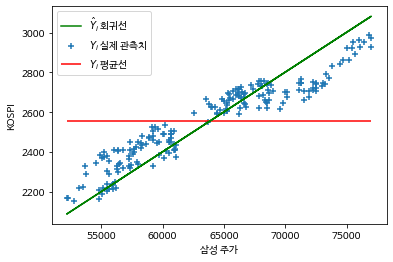

In [ ]:
# pip install yfinance
import yfinance as yf
import statsmodels.api as sm
# 기존 R에서 가능했던 다양한 회귀분석과 시계열

stock_price = yf.download({'005930.KS','^KS11'},'2022-01-01','2022-10-21')
print('타입 확인 : ', type(stock_price))

stock_price.info()

# 종속변수 target
target = stock_price['Adj Close']['^KS11']
# 독립변수
x = stock_price['Adj Close']['005930.KS']
print('target')

# 상수 값을 더해서 회귀식을 잘 표현
feature_add = sm.add_constant(x,has_constant='add')
model = sm.OLS(target,x)
fittedModel = model.fit()

print('결정계수 :', fittedModel.rsquared)
print(fittedModel.pvalues)
print('잔차의 제곱합 : ', fittedModel.mse_resid)

target_pred = fittedModel.predict()
plt.scatter(x,target,marker='+',label='$Y_i$ 실제 관측치')
plt.plot(x,target_pred,color='g',label='$\hat{Y}_i$ 회귀선')
plt.hlines(target.mean(),x.min(),x.max(),color='r',label='$Y_i$ 평균선')
plt.legend()
plt.xlabel('삼성 주가')
plt.ylabel('KOSPI')
plt.show()